In [3]:
import pandas as pd
import numpy as np

file = pd.read_csv("/Users/jdv/Desktop/ui_test_1E_wseSTRICT.csv")
file2 = pd.read_csv("/Users/jdv/Desktop/ui_test_1E_wseFREE.csv")
# file2_old = pd.read_csv("/Users/jdv/Desktop/ui_test_1E_wseFREE_OLD.csv")
# file2 = pd.read_csv("/Users/jdv/Desktop/ui_test_1E_wseFREE_OLD.csv")
y1 = np.array(file["ok"].values)
y2 = np.array(file2["ok"].values)


X1 = [file["n_samples"].values, file["ellipse_area"].values, file["wse_background"].values, file["ellipse_wse"].values]
X2 = [file2["n_samples"].values, file2["ellipse_area"].values, file2["wse_background"].values, file2["ellipse_wse"].values]

X = []
for i in range(len(X1)):
    X.append(np.append(X1[i], X2[i]))
X = np.rot90(X)
y = np.append(y1,y2)
# y = y2
# X = np.rot90(X2)

[0, 1]
[0, 2]
[0, 3]
[1, 2]
[1, 3]
[2, 3]


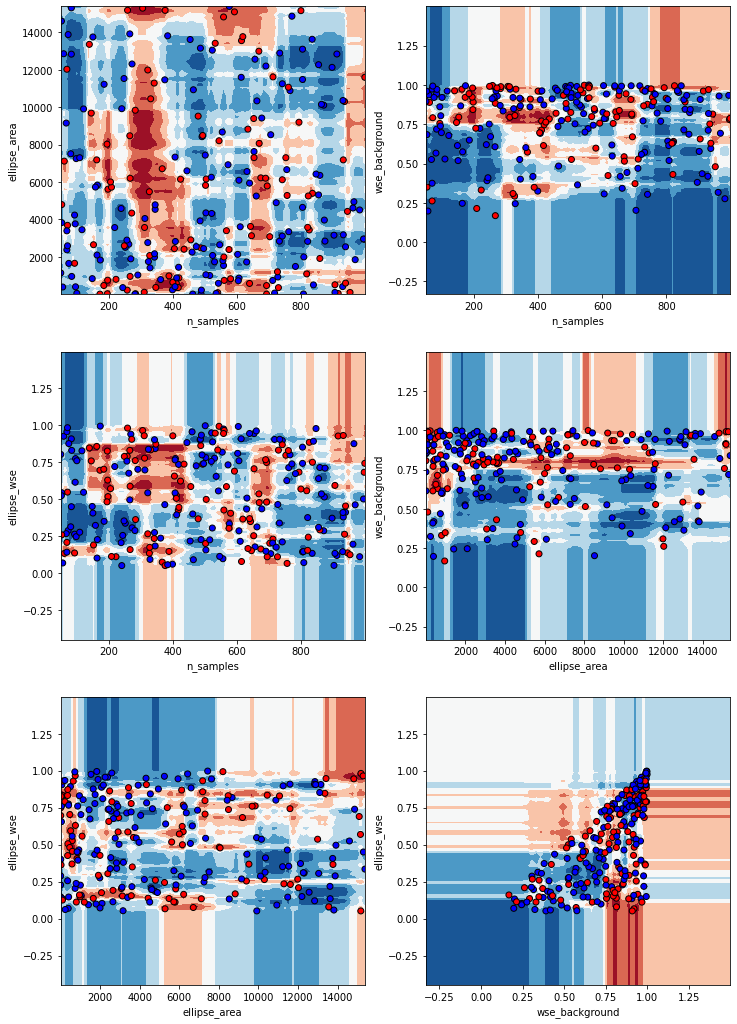

In [155]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

figure = plt.figure(figsize=(6 * 2, 6* 3))
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

feature_names = ["n_samples","ellipse_area","wse_background","ellipse_wse"]

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X_train, X_test, y_train, y_test = train_test_split(X[:, pair], y, stratify=y, random_state=42, test_size=0.25)
    x_min, x_max = X[:, pair[0]].min() - 0.5, X[:, pair[0]].max() + 0.5
    y_min, y_max = X[:, pair[1]].min() - 0.5, X[:, pair[1]].max() + 0.5
    ax = plt.subplot(3, 2, pairidx + 1)
    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)
    DecisionBoundaryDisplay.from_estimator(forest, X[:, pair], cmap=cm, ax=ax, eps=0.5)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c=y, cmap=cm_bright, edgecolors="k")
    
    print(pair)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
#     ax.set_xlabel(feature_names[0])
#     ax.set_ylabel(feature_names[1])
    ax.set_xlabel(feature_names[pair[0]])
    ax.set_ylabel(feature_names[pair[1]])
plt.show()

[0, 1]
[0, 2]
[0, 3]
[1, 2]
[1, 3]
[2, 3]


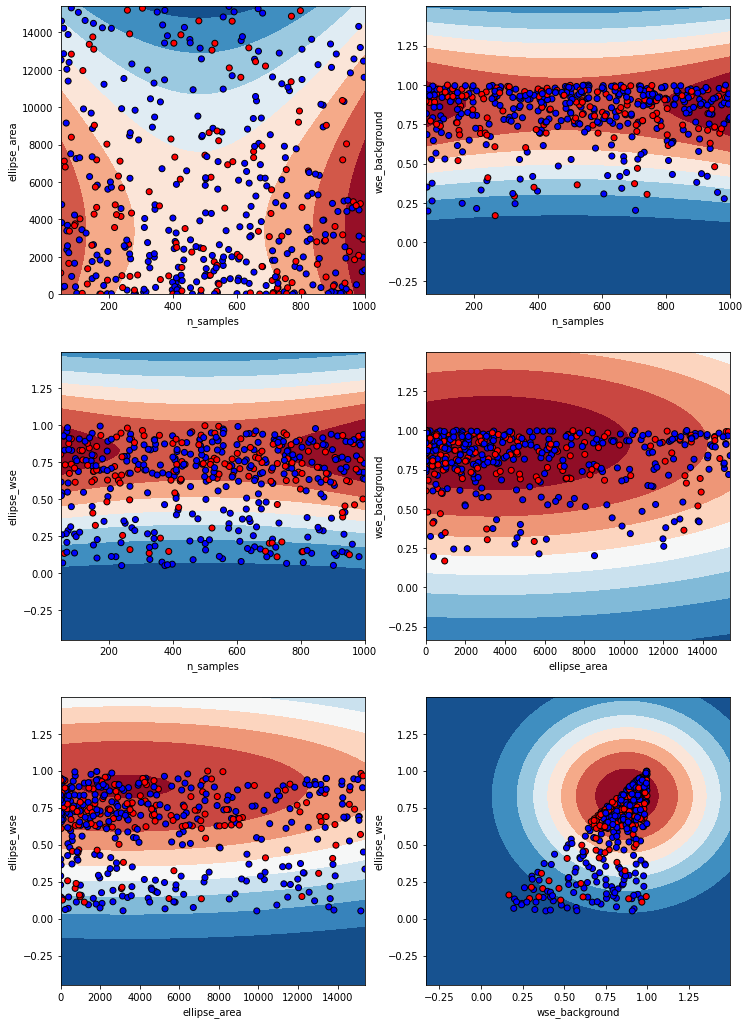

In [165]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF


figure = plt.figure(figsize=(6 * 2, 6* 3))
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

feature_names = ["n_samples","ellipse_area","wse_background","ellipse_wse"]

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X_train, X_test, y_train, y_test = train_test_split(X[:, pair], y, stratify=y, random_state=42, test_size=0.25)
    x_min, x_max = X[:, pair[0]].min() - 0.5, X[:, pair[0]].max() + 0.5
    y_min, y_max = X[:, pair[1]].min() - 0.5, X[:, pair[1]].max() + 0.5
    ax = plt.subplot(3, 2, pairidx + 1)
    forest = GaussianNB()
    forest.fit(X_train, y_train)
    DecisionBoundaryDisplay.from_estimator(forest, X[:, pair], cmap=cm, ax=ax, eps=0.5)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c=y, cmap=cm_bright, edgecolors="k")
    
    print(pair)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
#     ax.set_xlabel(feature_names[0])
#     ax.set_ylabel(feature_names[1])
    ax.set_xlabel(feature_names[pair[0]])
    ax.set_ylabel(feature_names[pair[1]])
    figure.savefig('./classifier_plots/{}-{}_gaussianNB.pdf'.format(feature_names[pair[0]],feature_names[pair[1]]), dpi=120)
plt.show()

[0, 1]
[0, 2]
[0, 3]
[1, 2]
[1, 3]
[2, 3]


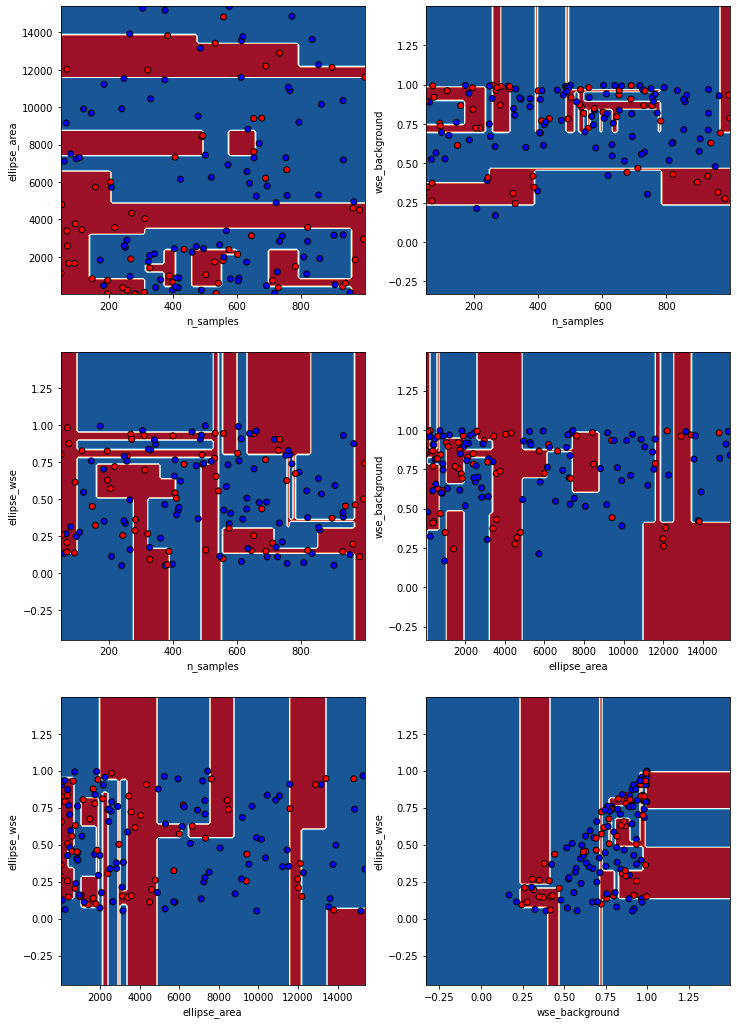

In [162]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

figure = plt.figure(figsize=(6 * 2, 6* 3))
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

feature_names = ["n_samples","ellipse_area","wse_background","ellipse_wse"]

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X_train, X_test, y_train, y_test = train_test_split(X[:, pair], y, stratify=y, random_state=42, test_size=0.25)
    x_min, x_max = X[:, pair[0]].min() - 0.5, X[:, pair[0]].max() + 0.5
    y_min, y_max = X[:, pair[1]].min() - 0.5, X[:, pair[1]].max() + 0.5
    ax = plt.subplot(3, 2, pairidx + 1)
    forest = DecisionTreeClassifier(random_state=0)
    forest.fit(X_train, y_train)
    DecisionBoundaryDisplay.from_estimator(forest, X[:, pair], cmap=cm, ax=ax, eps=0.5)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c=y, cmap=cm_bright, edgecolors="k")
    
    print(pair)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
#     ax.set_xlabel(feature_names[0])
#     ax.set_ylabel(feature_names[1])
    ax.set_xlabel(feature_names[pair[0]])
    ax.set_ylabel(feature_names[pair[1]])
plt.show()

[0, 1]
[0, 2]
[0, 3]
[1, 2]
[1, 3]
[2, 3]


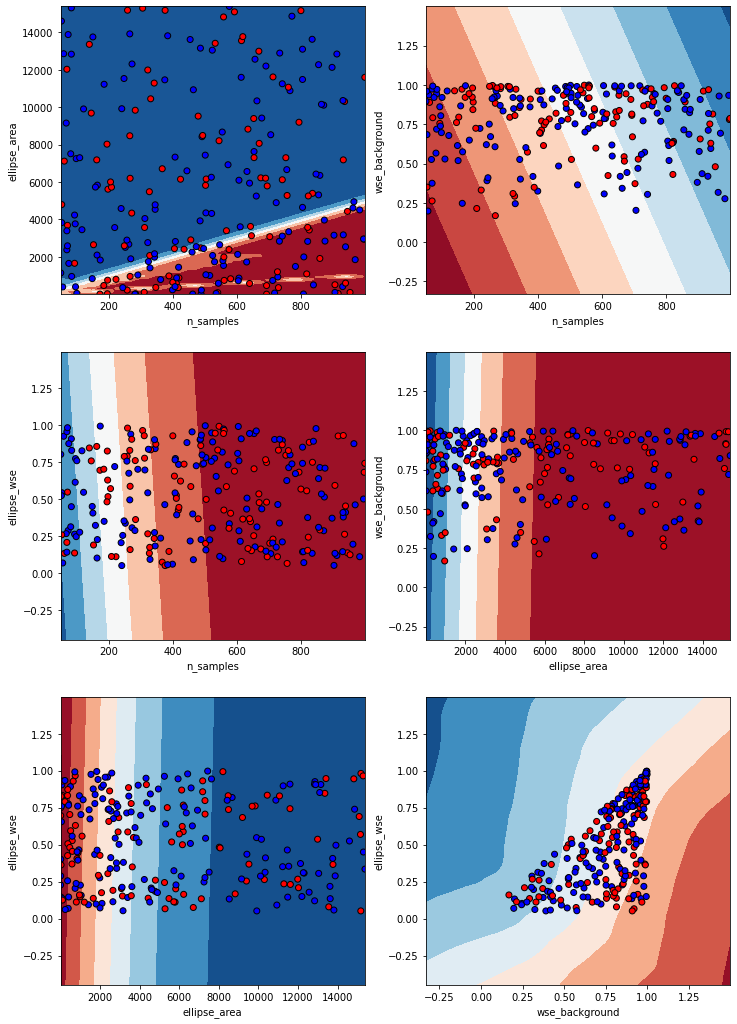

In [136]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

figure = plt.figure(figsize=(6 * 2, 6* 3))
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

feature_names = ["n_samples","ellipse_area","wse_background","ellipse_wse"]

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X_train, X_test, y_train, y_test = train_test_split(X[:, pair], y,  =y, random_state=42, test_size=0.25)
    x_min, x_max = X[:, pair[0]].min() - 0.5, X[:, pair[0]].max() + 0.5
    y_min, y_max = X[:, pair[1]].min() - 0.5, X[:, pair[1]].max() + 0.5
    ax = plt.subplot(3, 2, pairidx + 1)
    forest = MLPClassifier()
    forest.fit(X_train, y_train)
    DecisionBoundaryDisplay.from_estimator(forest, X[:, pair], cmap=cm, ax=ax, eps=0.5)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c=y, cmap=cm_bright, edgecolors="k")
    
    print(pair)
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
#     ax.set_xlabel(feature_names[0])
#     ax.set_ylabel(feature_names[1])
    ax.set_xlabel(feature_names[pair[0]])
    ax.set_ylabel(feature_names[pair[1]])
plt.show()

[0, 1]
[0, 2]
[0, 3]
[1, 2]
[1, 3]
[2, 3]


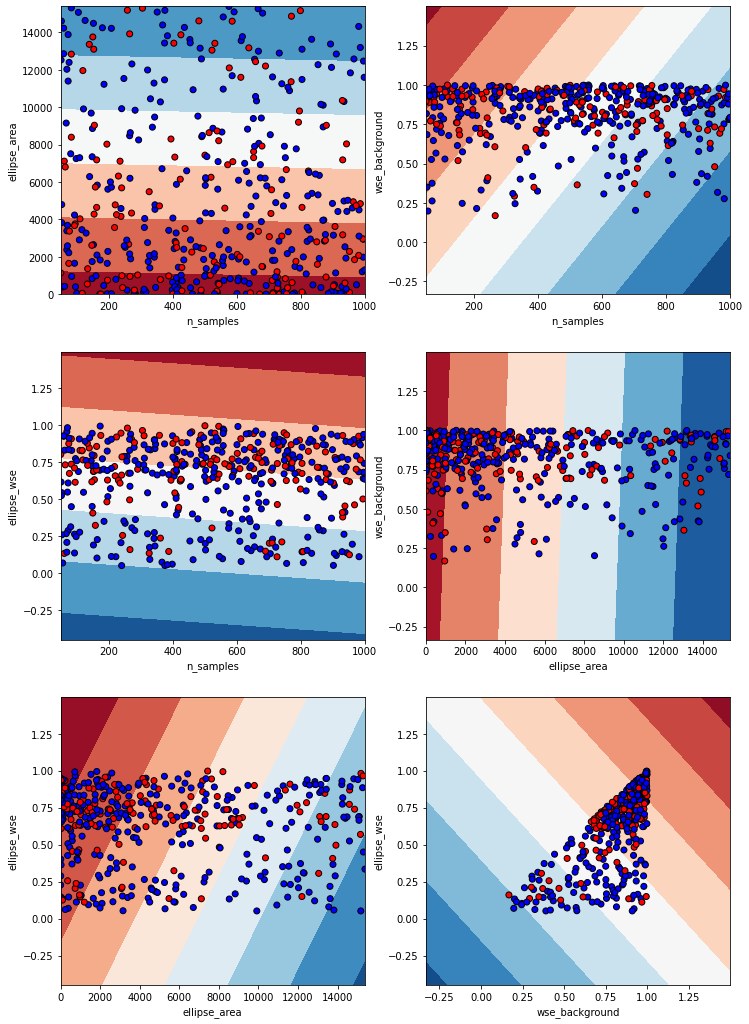

In [7]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import svm, datasets

figure = plt.figure(figsize=(6 * 2, 6* 3))
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

feature_names = ["n_samples","ellipse_area","wse_background","ellipse_wse"]

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X_train, X_test, y_train, y_test = train_test_split(X[:, pair], y, stratify=y, random_state=42, test_size=0.25)
    x_min, x_max = X[:, pair[0]].min() - 0.5, X[:, pair[0]].max() + 0.5
    y_min, y_max = X[:, pair[1]].min() - 0.5, X[:, pair[1]].max() + 0.5
    ax = plt.subplot(3, 2, pairidx + 1)
    forest = svm.SVC(kernel="linear", C=0.35)
    forest.fit(X_train, y_train)
    DecisionBoundaryDisplay.from_estimator(forest, X[:, pair], cmap=cm, ax=ax, eps=0.5)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c=y, cmap=cm_bright, edgecolors="k")
    
    print(pair)
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
#     ax.set_xlabel(feature_names[0])
#     ax.set_ylabel(feature_names[1])
    ax.set_xlabel(feature_names[pair[0]])
    ax.set_ylabel(feature_names[pair[1]])
plt.show()